# SELECT ~ FROM ~ WHERE

## 관계 연산자, 논리 연산자의 사용

In [ ]:
SELECT mem_id, mem_name 
    FROM member
    WHERE height <= 162;
    
SELECT mem_id, mem_name 
    FROM member
    WHERE height >= 165 AND mem_number > 6;
    
SELECT mem_id, mem_name 
    FROM member
    WHERE height >= 165 OR mem_number > 6;

## BETWEEN ~ AND 

In [ ]:
SELECT mem_id, mem_name 
    FROM member
    WHERE height >= 163 AND height <=165;
    
SELECT mem_id, mem_name 
    FROM member
    WHERE height BETWEEN 163 AND 165;

## IN

In [ ]:
SELECT mem_name, addr
    FROM member
    WHERE addr = '경기' OR addr = '전남' OR addr = '경남';

## LIKE
- 문자열의 일부 글자 검색 

In [ ]:
# 제일 앞 글자가 '우'이고 그 뒤는 무엇이든(%) 허용 
SELECT * 
    FROM member
    WHERE mem_name LIKE '우%' 
    
# 글자와 매치
SELECT *
    FROM member
    WHERE mem_name LIKE '__핑크';

# 서브쿼리

- SELECT 안에 또 다른 SELECT 

In [ ]:
SELECT height FROM member WHERE mem_name = '에이핑크';
SELECT mem_name, height FROM member WHERE height > 164;

# 서브쿼리
SELECT mem_name, height FROM member 
    WHERE height > (SELECT height FROM member WHERE mem_name = '에이핑크');

# SELECT 심화

**ORDER BY**
- 결과의 정렬

**LIMIT**
- 결과의 개수 제한

**DISTINCT**
- 중복된 데이터 제거

**GROUP BY**
- 지정한 열의 데이터들을 같은 데이터끼리는 묶어서 결과를 추출
- 집계 함수와 함께 사용 
- HAVING 절을 통해 조건식 추가 

## ORDER BY 절

- 결과의 값이나 개수에 대해서는 영향 미치지 않음
- 결과가 출력되는 순서를 조절
- 기본값 ASC(오름차순)
- DESC : 내림차순 

In [ ]:
SELECT 열_이름
    FROM 테이블_이름
    WHERE 조건식
    GROUP BY 열_이름
    HAVING 조건식
    ORDER BY 열_이름
    LIMIT 숫자

In [ ]:
SELECT mem_id, mem_name, debut_date
    FROM member
    ORDER BY debut_date;

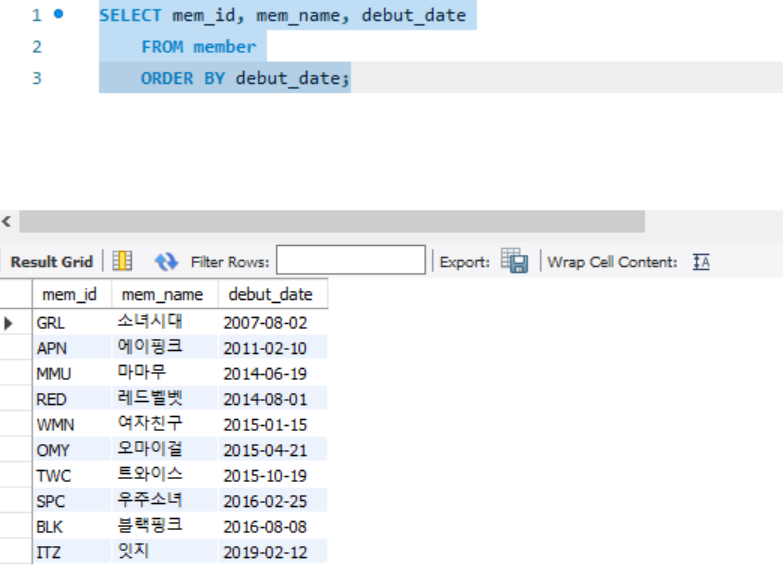

In [ ]:
SELECT mem_id, mem_name, debut_date
    FROM member
    ORDER BY debut_date DESC;

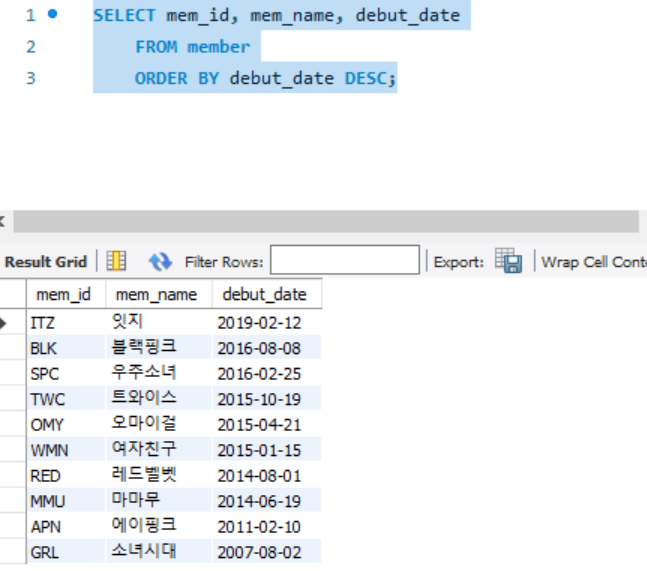

In [ ]:
# WHERE 절이 ORDER BY 절보다 뒤에 나오면 에러
SELECT mem_id, mem_name, debut_date, height
    FROM member
    WHERE height >= 164         
    ORDER BY height DESC;

# 정렬 기준 여러개
SELECT mem_id, mem_name, debut_date, height
    FROM member
    WHERE height >= 164         
    ORDER BY height DESC, debut_date ASC;

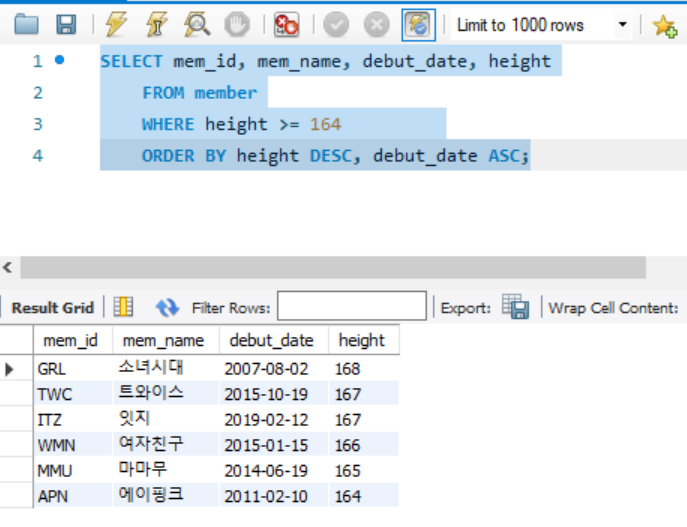

## LIMIT

- 출력하는 개수 제한

In [ ]:
SELECT *
    FROM member
    LIMIT 3;
    
# 정렬 후 몇 건만 추출
SELECT *
    FROM member
    ORDER BY debut_date
    LIMIT 3;
    
# 중간부터 출력 
# 3번째부터 2건만 
SELECT mem_name, height
    FROM member
    ORDER BY height DESC
    LIMIT 3, 2;

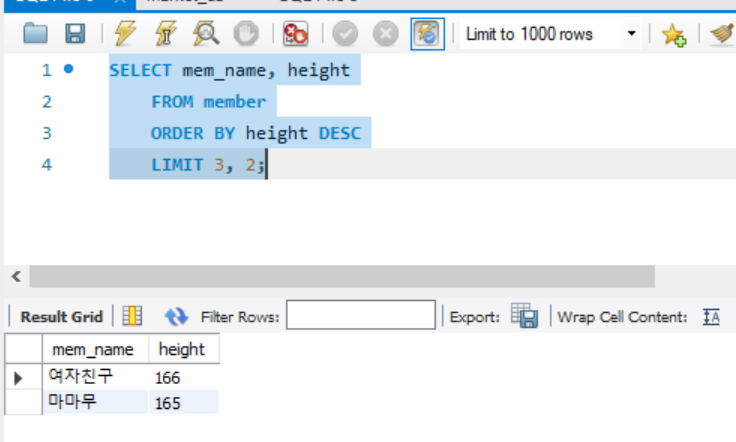

## DISTINCT

- 조회된 결과에서 중복된 데이터를 1개만 남김
- 열 이름 앞에 DISTINCT를 써주면 됨

In [ ]:
SELECT addr FROM member;

# 정렬
SELECT addr FROM member ORDER BY addr;

# 중복 제거
SELECT DISTINCT addr FROM member;

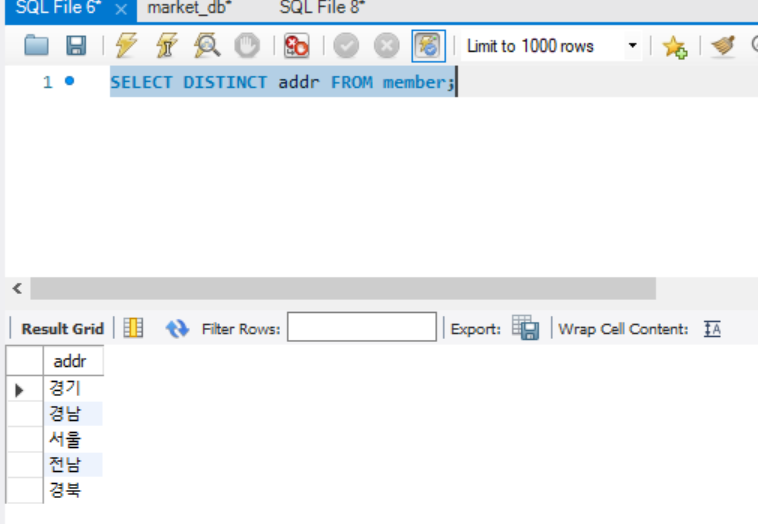

## GROUP BY

- 그룹으로 묶어주는 역할
- 함께 주로 사용되는 집계 함수
1. SUM
2, AVG
3. MIN
4. MAX
5. COUNT
6. COUNT(DISTINCT) : 행의 개수를 세고 중복은 1개만 인정 

In [ ]:
SELECT mem_id, amount 
    FROM buy 
    GROUP BY mem_id 
    
# SUM
SELECT mem_id, SUM(amount) 
    FROM buy 
    GROUP BY mem_id 
    
# 별칭 사용
# 큰따옴표 권장
SELECT mem_id "회원 아이디", SUM(amount) "총 구매 개수"
    FROM buy 
    GROUP BY mem_id 
    
SELECT mem_id "회원 아이디", SUM(price*amount) "총 구매 금액"
    FROM buy
    GROUP BY mem_id;
    
# AVG
SELECT AVG(amount) "평균 구매 개수" FROM buy;

# 그룹별 평균 구매 개수
SELECT mem_id, AVG(amount) "평균 구매 개수" 
    FROM buy
    GROUP BY mem_id;
    
# COUNT 
SELECT COUNT(*) FROM member;

# 연락처가 있는 회원
SELECT COUNT(phone1) "연락처가 있는 회원"
    FROM member;

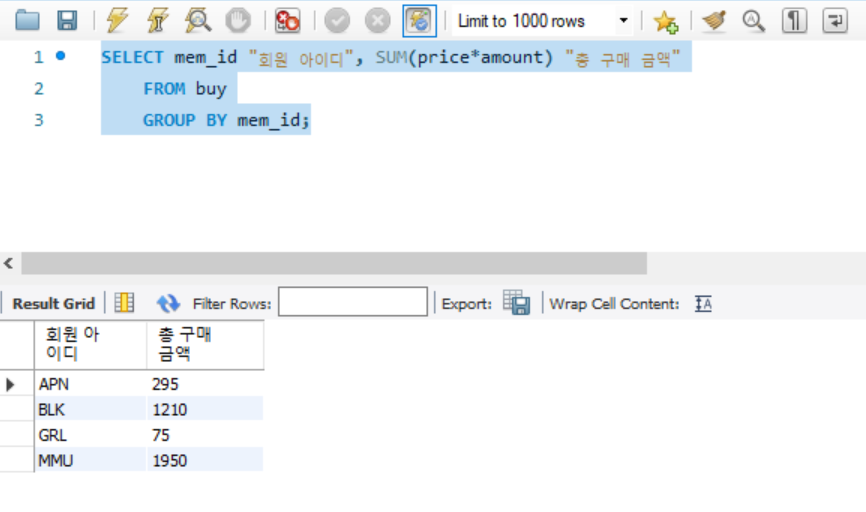

## Having 절

- WHERE과 비슷한 개념으로 조건을 제한
- 집계 함수에 대해서 조건을 제한
- GROUP BY 절 다음에 나와야 함

In [ ]:
SELECT mem_id "회원 아이디", SUM(price*amount) "총 구매 금액"
    FROM buy
    GROUP BY mem_id
    HAVING SUM(price*amount) > 1000;

# ORDER BY 추가
SELECT mem_id "회원 아이디", SUM(price*amount) "총 구매 금액"
    FROM buy
    GROUP BY mem_id
    HAVING SUM(price*amount) > 1000
    ORDER BY SUM(price*amount) DESC;

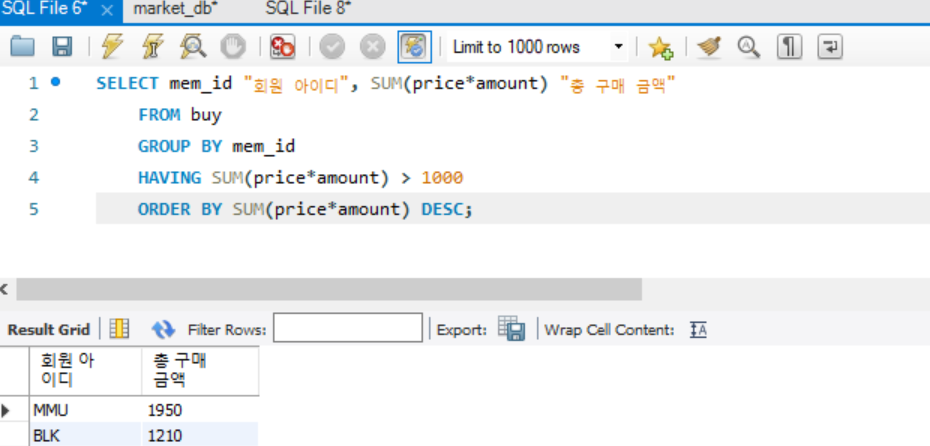

# 테이블 변경

**INSERT**
- 입력

**UPDATE**
- 수정

**DELETE**
- 삭제

## INSERT

- INSERT INTO 테이블 [(열1, 열2, ...)] VALUES (값1, 값2, ...)

**AUTO_INCREMENT**
- 열을 정의할 때 1부터 증가하는 값 입력
- INSERT에서는 해당 열이 없다고 생각
- AUTO_INCREMENT로 지정하는 열은 꼭 PRIMARY KEY로 지정

**시스템변수**
- MySQL에서 자체적으로 가지고 있는 설정값이 저장된 변수
- 앞에 @@이 붙는 것이 특징
- 시스템 변수 값 확인 : SELECT @@시스템변수
- 전체 시스템 변수 종류 알기 : SHOW GLOBAL VARIABLES

**여러 줄을 한줄로 작성**
- INSERT INTO 테이블_이름 VALUES (값1, 값2, ...);
- INSERT INTO 테이블_이름 VALUES (값3, 값4, ...);
- INSERT INTO 테이블_이름 VALUES (값1, 값2, ...), (값3, 값4, ...), (값5, 값6, ...);

In [ ]:
USE market_db;
CREATE TABLE hongong1 (toy_id INT, toy_name CHAR(4), age INT);
INSERT INTO hongong1 VALUES (1, '우디', 25);

# 나이는 입력하고 싶지 않을 때
# NULL 값 들어감
INSERT INTO hongong1 (toy_id, toy_name) VALUES (2, '버즈');

# 열의 순서를 바꿔서 입력하고 싶을 떄
INSERT INTO hongong1 (toy_name, age, toy_id) VALUES ('제시', 20, 3);

# AUTO_INCREMENT
CREATE TABLE hongong2 (
    toy_id INT AUTO_INCREMENT PRIMARY KEY,
    toy_name CHAR(4), 
    age INT);

INSERT INTO hongong2 VALUES (NULL, '보핍', 25);
INSERT INTO hongong2 VALUES (NULL, '슬링키', 22);
INSERT INTO hongong2 VALUES (NULL, '렉스', 21);

SELECT * FROM hongong2;

# 어느 숫자까지 증가되었는지
SELECT LAST_INSERT_ID();

# AUTO_INCREMENT로 입력되는 다음 값을 100부터 시작하도록 변경
# ALTER TABLE 뒤에는 테이블 이름 입력
ALTER TABLE hongong2 AUTO_INCREMENT=100;
INSERT INTO hongong2 VALUES (NULL, '재남', 35);
SELECT * FROM hongong2;

# 증가값을 3씩 
CREATE TABLE hongong3 (
    toy_id INT AUTO_INCREMENT PRIMARY KEY,
    toy_name CHAR(4), 
    age INT);
ALTER TABLE hongong3 AUTO_INCREMENT=1000; # 시작값은 1000으로 지정
SET @@auto_increment_increment=3; # 증가값은 3으로

INSERT INTO hongong3 VALUES (NULL, '토마스', 20);
INSERT INTO hongong3 VALUES (NULL, '고든', 23);
INSERT INTO hongong3 VALUES (NULL, '제임스', 25);

SELECT * FROM hongong3;

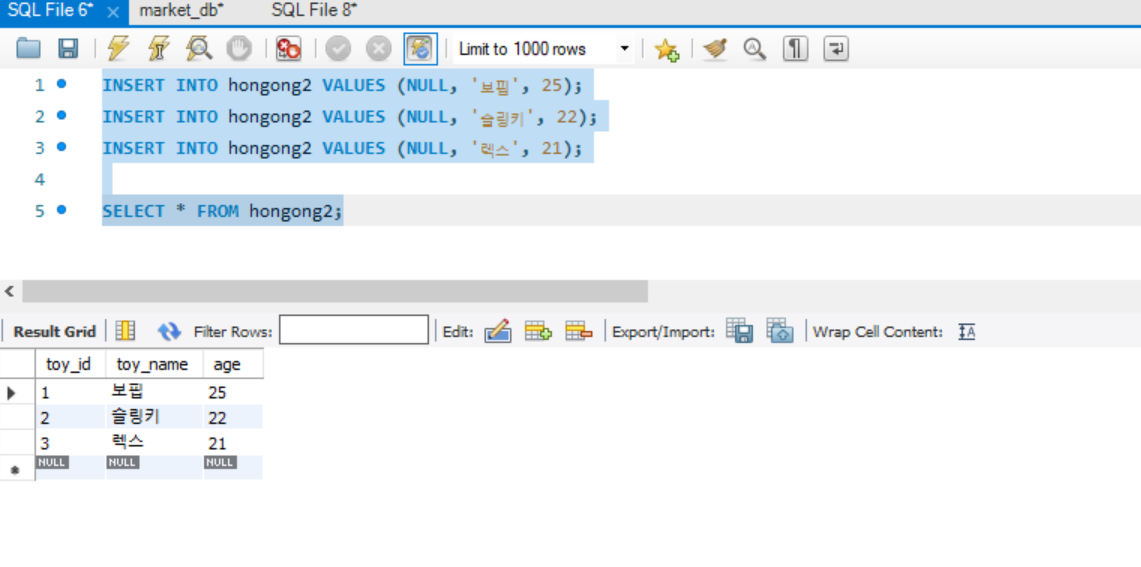

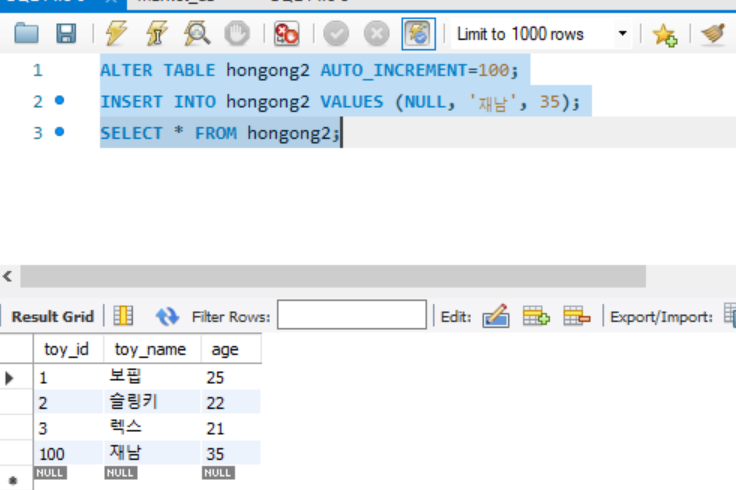

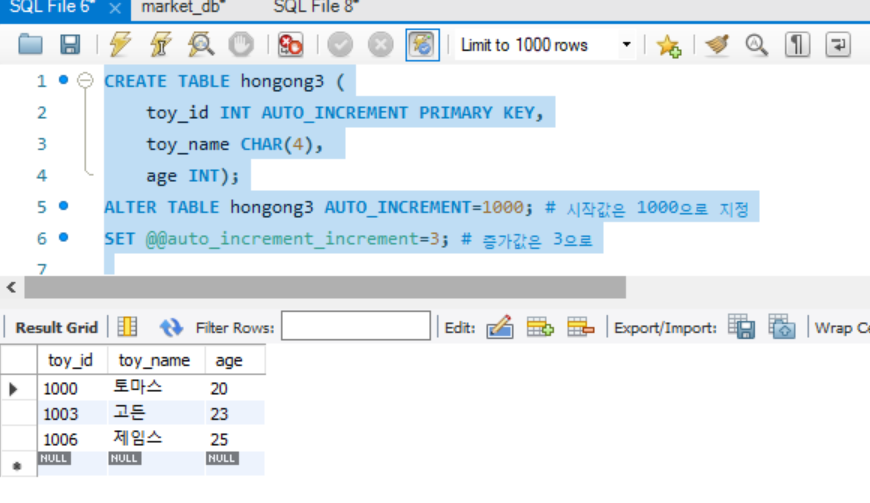

### 다른 테이블의 데이터를 한 번에 입력하는 INSERT INTO ~ SELECT

- SELECT 문의 열 개수는 INSERT할 테이블의 열 개수와 같아야 함 

In [ ]:
INSERT INTO 테이블_이름 (열_이름1, 열_이름2, ...)
    SELECT 문 ; 

In [ ]:
SELECT COUNT(*) FROM world.city;

# DESC 테이블 구조 확인
DESC world.city;

# 데이터 살피기
SELECT * FROM world.city LIMIT 5;

# 테이블 생성
CREATE TABLE city_popul (city_name CHAR(35), population INT);

# 다른 테이블의 데이터 한 번에 가져오기
INSERT INTO city_popul
    SELECT Name, Population FROM world.city;

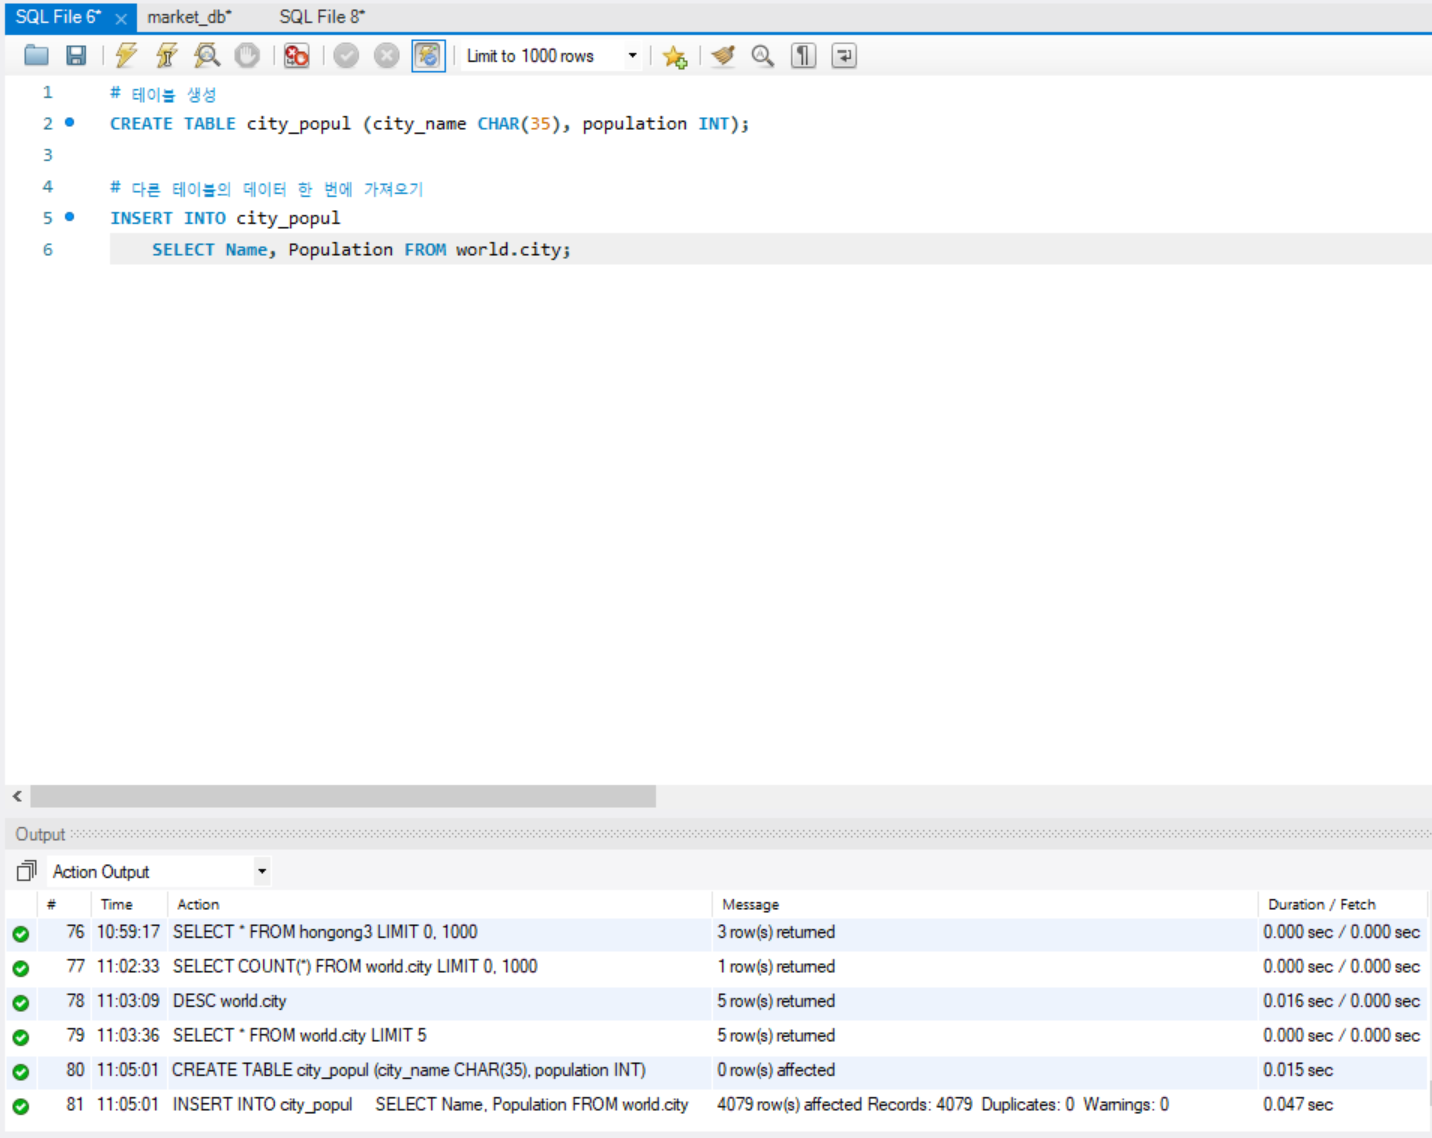